<a id = '4.0'></a>
<p style = "font-size : 35px; color : #34656d ;  text-align : center; background-color : #08f9f9; border-radius: 5px 5px;"><strong>Multi-Class Logistic Regression (Iris)</strong></p> 

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [47]:
df = pd.read_csv('iris (1).csv')

In [48]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.100,3.500,1.400,0.200,setosa
1,4.900,3.000,1.400,0.200,setosa
2,4.700,3.200,1.300,0.200,setosa
3,4.600,3.100,1.500,0.200,setosa
4,5.000,3.600,1.400,0.200,setosa


## Exploratory Data Analysis and Visualization

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.000,5.843,0.828,4.300,5.100,5.800,6.400,7.900
sepal_width,150.000,3.054,0.434,2.000,2.800,3.000,3.300,4.400
petal_length,150.000,3.759,1.764,1.000,1.600,4.350,5.100,6.900
petal_width,150.000,1.199,0.763,0.100,0.300,1.300,1.800,2.500


In [51]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

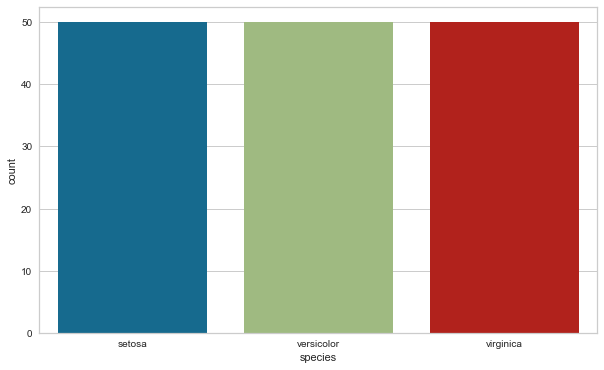

In [52]:
sns.countplot(df['species']);

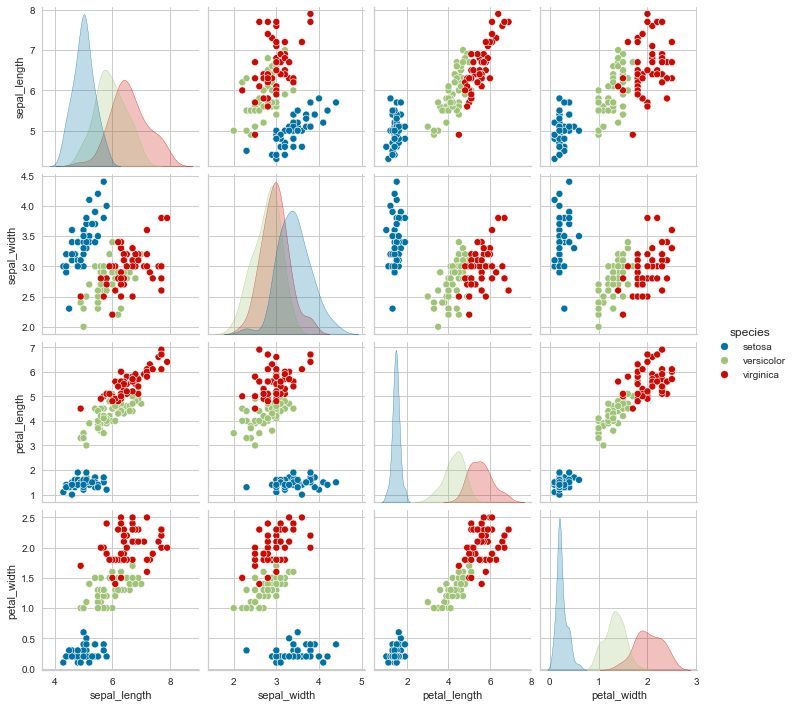

In [53]:
sns.pairplot(df,hue='species');

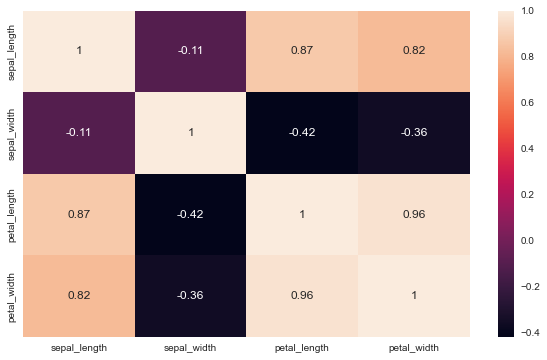

In [54]:
sns.heatmap(df.corr(),annot=True);

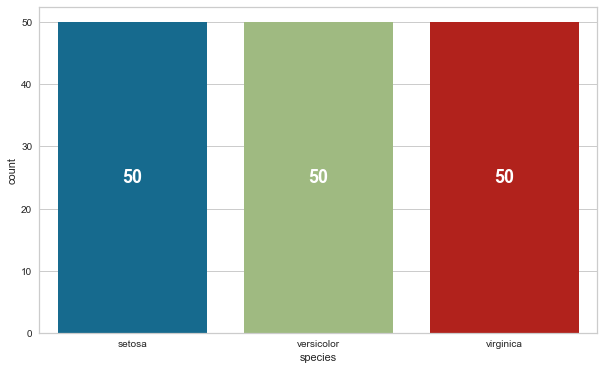

In [55]:
g = sns.countplot(df['species'])
g.bar_label(g.containers[0], label_type='center', fontsize=18, color='w', weight='bold');

## Train | Test Split and Scaling

In [56]:
X = df.drop('species',axis=1)
y = df['species']

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [59]:
scaler = StandardScaler()

In [60]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelling and Model Performance

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

### With Default Parameters

In [62]:
log_model = LogisticRegression()

In [63]:
log_model.fit(X_train_scaled,y_train)
y_pred = log_model.predict(X_test_scaled)
y_pred

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa'],
      dtype=object)

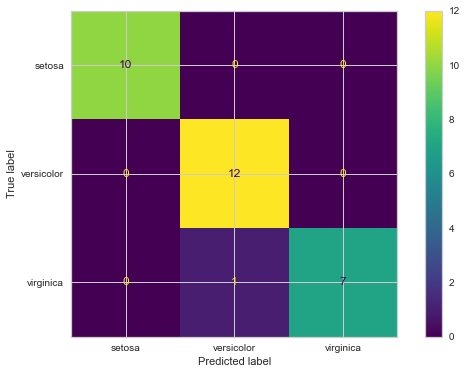

In [64]:
plot_confusion_matrix(log_model, X_test_scaled, y_test)

In [65]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [66]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[10  0  0]
 [ 0 12  0]
 [ 0  1  7]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.92      1.00      0.96        12
   virginica       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30


Train_Set
[[40  0  0]
 [ 0 35  3]
 [ 0  1 41]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.97      0.92      0.95        38
   virginica       0.93      0.98      0.95        42

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



### Cross Validate

In [67]:
from sklearn.model_selection import cross_validate

model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy             0.950
test_precision_weighted   0.960
test_recall_weighted      0.950
test_f1_weighted          0.949
dtype: float64

### Cross Validate for versicolor

In [68]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

f1_versicolor = make_scorer(f1_score, average = None, labels =["versicolor"])
precision_versicolor = make_scorer(precision_score, average = None, labels =["versicolor"])
recall_versicolor = make_scorer(recall_score, average = None, labels =["versicolor"])

In [69]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = {"f1_versicolor":f1_versicolor, 
                                                                   "precision_versicolor":precision_versicolor,
                                                                   "recall_versicolor":recall_versicolor}, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_versicolor          0.924
test_precision_versicolor   0.940
test_recall_versicolor      0.925
dtype: float64

## Class prediction

In [70]:
y_pred=log_model.predict(X_test_scaled)
y_pred_proba = log_model.predict_proba(X_test_scaled)

test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba_setosa"] = y_pred_proba[:,0]
test_data["pred_proba_versicolar"] = y_pred_proba[:,1]
test_data["pred_proba_virginica"] = y_pred_proba[:,2]
test_data.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species,pred,pred_proba_setosa,pred_proba_versicolar,pred_proba_virginica
50,7.000,3.200,4.700,1.400,versicolor,versicolor,0.009,0.852,0.139
65,6.700,3.100,4.400,1.400,versicolor,versicolor,0.014,0.875,0.111
97,6.200,2.900,4.300,1.300,versicolor,versicolor,0.019,0.898,0.082
123,6.300,2.700,4.900,1.800,virginica,virginica,0.001,0.329,0.670
74,6.400,2.900,4.300,1.300,versicolor,versicolor,0.014,0.905,0.082
147,6.500,3.000,5.200,2.000,virginica,virginica,0.001,0.161,0.838
122,7.700,2.800,6.700,2.000,virginica,virginica,0.000,0.026,0.974
80,5.500,2.400,3.800,1.100,versicolor,versicolor,0.019,0.948,0.033
127,6.100,3.000,4.900,1.800,virginica,virginica,0.006,0.390,0.604
31,5.400,3.400,1.500,0.400,setosa,setosa,0.942,0.058,0.000


### With Best Parameters (GridsearchCV)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [71]:
log_model = LogisticRegression(max_iter=5000)

In [72]:
penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)

param_grid = {"penalty" : penalty,
             "C" : C}

In [73]:
grid_model = GridSearchCV(log_model, param_grid = param_grid, cv=5) 
#scoring = f1_setosa = make_scorer(f1_score, average = None, labels =["setosa"]) 

In [74]:
grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'penalty': ['l1', 'l2']})

In [75]:
grid_model.best_params_ # default accuracy score

{'C': 16.23776739188721, 'penalty': 'l2'}

In [76]:
grid_model.best_score_

0.9666666666666668

In [77]:
y_pred = grid_model.predict(X_test_scaled)
y_pred

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa'],
      dtype=object)

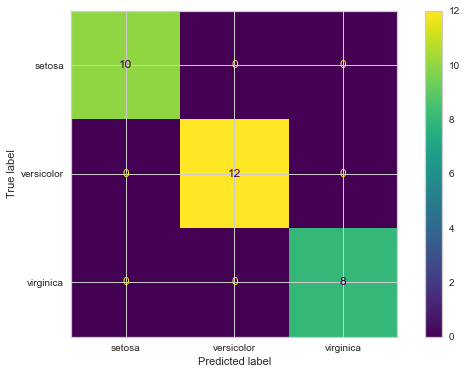

In [78]:
plot_confusion_matrix(grid_model, X_test_scaled, y_test)

In [79]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        12
   virginica       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Train_Set
[[40  0  0]
 [ 0 37  1]
 [ 0  1 41]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.97      0.97      0.97        38
   virginica       0.98      0.98      0.98        42

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [80]:
from sklearn.metrics import plot_roc_curve

In [81]:
plot_roc_curve(grid_model, X_test_scaled, y_test);

ValueError: Expected 'estimator' to be a binary classifier, but got GridSearchCV fit on multiclass (3 classes) data

https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

In [82]:
# import sys
# sys.path.append("/usr/local/lib/python3.9/site-packages")


In [90]:
classes = model.classes_

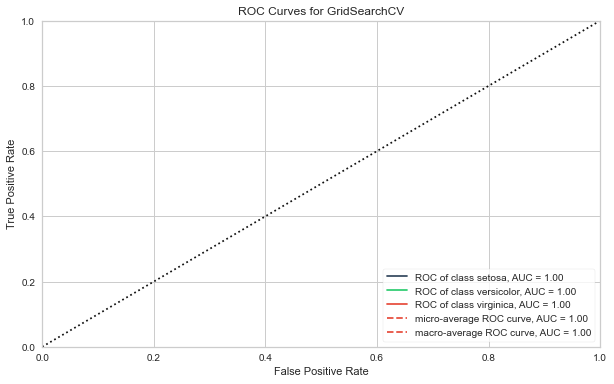

In [96]:
from yellowbrick.classifier import ROCAUC
model = grid_model
visualizer = ROCAUC(model)

visualizer.fit(X_train_scaled, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)        # Evaluate the model on the test data
visualizer.show();               

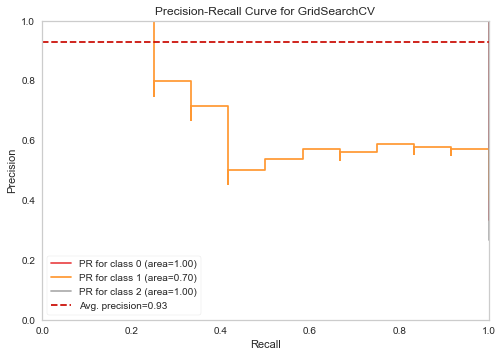

In [40]:
from yellowbrick.classifier import PrecisionRecallCurve

model = grid_model

viz = PrecisionRecallCurve(
    model,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_scaled, y_train)
viz.score(X_test_scaled, y_test)
viz.show();

## Final Model and Model Deployment

In [ ]:
scaler = StandardScaler().fit(X)

In [ ]:
import pickle
pickle.dump(scaler, open("scaler_iris", 'wb'))

In [ ]:
X_scaled = scaler.transform(X)

In [ ]:
final_model = LogisticRegression().fit(X_scaled, y)

In [ ]:
pickle.dump(final_model, open("final_model_iris", 'wb'))

# Using the Model

In [ ]:
X.describe().T

In [ ]:
my_dict = {"sepal_length": [4.5, 5.8, 7.5],
           "sepal_width": [2.2, 3, 4.2],
           "petal_length": [1.3, 4.3, 6.5],
           "petal_width": [0.2, 1.3, 2.3]
          }

In [ ]:
sample = pd.DataFrame(my_dict)
sample

In [ ]:
scaler_iris = pickle.load(open("scaler_iris", "rb"))

In [ ]:
sample_scaled = scaler_iris.transform(sample)
sample_scaled

In [ ]:
final_model = pickle.load(open("final_model_iris", "rb"))

In [ ]:
predictions = final_model.predict(sample_scaled)
predictions_proba = final_model.predict_proba(sample_scaled)

In [ ]:
sample["pred"] = predictions
sample["pred_proba_setosa"] = predictions_proba[:,0]
sample["pred_proba_versicolor"] = predictions_proba[:,1]
sample["pred_proba_virginica"] = predictions_proba[:,2]
sample